<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3959 entries, 0 to 3958
Columns: 217 entries, Title to Staten Island_right
dtypes: float64(5), uint8(212)
memory usage: 974.4 KB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 419 entries, 0 to 3958
Columns: 217 entries, Title to Staten Island_right
dtypes: float64(5), uint8(212)
memory usage: 106.4 KB
(251, 7)
(168, 7)
(251,)
(168,)
1.6076029396572267e-13


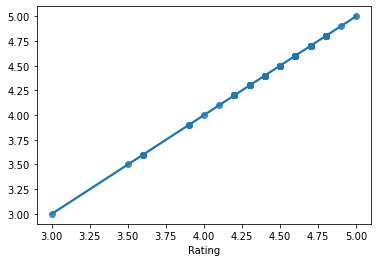

                            OLS Regression Results                            
Dep. Variable:                 Rating   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.072e+29
Date:                Sun, 06 Feb 2022   Prob (F-statistic):               0.00
Time:                        10:40:22   Log-Likelihood:                 7839.4
No. Observations:                 251   AIC:                        -1.567e+04
Df Residuals:                     246   BIC:                        -1.565e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -1.016e-14   6.91e-15  

In [24]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import xgboost as xgb
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from sklearn.metrics import r2_score

scale = StandardScaler()

open_tables = pd.read_csv('open_table_new_york.csv')
# Load data into DataFrame
df = pd.DataFrame(data=open_tables)
df.head()


df.shape



one_hot = pd.get_dummies(df['Kitchen'])
# Drop column B as it is now encoded
df = df.drop('Kitchen', axis=1)
# Join the encoded df
df = df.join(one_hot)


one_hot = pd.get_dummies(df['Location'])
# Drop column B as it is now encoded
df = df.drop('Location', axis=1)
# Join the encoded df
df = df.join(one_hot)


one_hot = pd.get_dummies(df['Boroughs'])
# Drop column B as it is now encoded
df = df.drop('Boroughs', axis=1)
# Join the encoded df
df = df.join(one_hot, on='Location', lsuffix='_left', rsuffix='_right', how='left')

df = df.apply(pd.to_numeric, errors='coerce')
print(df.info())
df.describe()


df = df.dropna(subset=["Voters"])
df = df.dropna(subset=["Boroughs"])
df = df.dropna(subset=["Clients last day"])
df = df.dropna(subset=["Rating"])
df = df.dropna(subset=["Voters"])
df = df.dropna(subset=["Location"])
df = df.dropna(subset=["Kitchen"])
df = df.dropna(subset=["Price"])
df.describe()

df.info()
#sns.pairplot(df,x_vars=['Voters','Clients last day'],y_vars=['Rating'])

#sns.heatmap(df.corr(),annot=True,lw=1)




X = df[['Voters', 'Clients last day']]
scaledX = scale.fit_transform(X)
#sns.boxplot('Voters', 'Clients last day', data=df)

X = df[['Kitchen', 'Rating']]
scaledX = scale.fit_transform(X)
#sns.boxplot(scaledX,data=df)
X = df[['Kitchen', 'Rating', 'Clients last day', 'Voters', "Boroughs", "Location", "Price"]]                        
            
Y = df['Rating']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.4, random_state=101)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)


# print the intercept
print(model.intercept_)


coeff_parameter = pd.DataFrame(model.coef_,X.columns,columns=['Coefficient'])
coeff_parameter


predictions = model.predict(X_test)
sns.regplot(y_test,predictions)
plt.show()


import statsmodels.api as sm
X_train_Sm= sm.add_constant(X_train)
X_train_Sm= sm.add_constant(X_train)
ls=sm.OLS(y_train,X_train_Sm).fit()
print(ls.summary())


y_pred = model.predict(X_test)

# print ("y_pred is ")
# print(y_pred)
# print ("y_test is ")
# print (y_test)
y_pred_list = y_pred.tolist()
y_test_list = y_test.tolist()
# Calling DataFrame constructor after zipping
# both lists, with columns specified
df_x = pd.DataFrame(list(zip(y_test_list, y_pred_list)),
               columns =['Actual values', 'Predicted values'])

print(df_x)

print("Results of the Linear Regression Model")
print("MSE (mean squared error) is ", metrics.mean_squared_error(y_train.shape, y_pred.shape))
mse = mean_squared_error(y_test, ypred)
print("RMSE (root-mean-square deviation): %.2f" % (mse**(1/2.0)))

print("y_test.shape is ", y_test.shape)
print(" y_pred.shape is ",  y_pred.shape)
array_y_test = np.array([y_test])
arra_y_pred = np.array([predictions])

r2 = r2_score(array_y_test.shape, arra_y_pred.shape)
print("r2_score of the Linear Regression is ", r2)

####################################################


xgbr = xgb.XGBRegressor(verbosity=0)



xgbr.fit(X_train, y_train)
 
score = xgbr.score(X_train, y_train)   
print("Training score: ", score) 
 
# - cross validataion 
scores = cross_val_score(xgbr, X_train, y_train, cv=5)
print("Mean cross-validation score: %.2f" % scores.mean())

kfold = KFold(n_splits=10, shuffle=True)
kf_cv_scores = cross_val_score(xgbr, X_train, y_train, cv=kfold )
print("K-fold CV average score: %.2f" % kf_cv_scores.mean())
 
ypred = xgbr.predict(X_test)
mse = mean_squared_error(y_test, ypred)
print("Results of the XGBRegressor Model")
print("MSE  (mean squared_error): %.2f" % mse)
print("RMSE (root-mean-square deviation): %.2f" % (mse**(1/2.0)))

array_y_test_xregressor = np.array([y_test])
arra_y_pred_xregressor = np.array([ypred])

r2_xregressor = r2_score(array_y_test_xregressor.shape, arra_y_pred_xregressor.shape)
print("r2_score XRegression is ", r2_xregressor)

x_ax = range(len(y_test))
#plt.scatter(x_ax, y_test, s=5, color="blue", label="original")
#plt.plot(x_ax, ypred, lw=0.8, color="red", label="predicted")
#plt.legend()
#plt.show()


y_test_list = y_test.tolist()
ypred_list = ypred.tolist() 
# Calling DataFrame constructor after zipping
# both lists, with columns specified
df_x = pd.DataFrame(list(zip(y_test_list, ypred_list)),
               columns =['Original values', 'Predicted values'])

print(df_x)

In [ ]:
!pip install seaborn

In [ ]:
!pip install xgboost